## Autograd
El paquete de autograd es central a todo el backend donde corre PyTorch. Nos permite tener automatic differentiation (que son las técnicas que permiten realizar cálculo numérico aproximado con el ordenador - derivadas, integrales, etc.) y funciona de manera "define-by-run framework". Es decir que cada ejecución puede ser diferente.

Basado en la documentación:

**torch.Tensor** is the central class of the package. If you set its attribute **.requires_grad** as True, it starts to track all operations on it. When you finish your computation you can call **.backward()** and have all the gradients computed automatically. The gradient for this tensor will be accumulated into **.grad** attribute.

To stop a tensor from tracking history, you can call **.detach()** to detach it from the computation history, and to prevent future computation from being tracked.

To prevent tracking history (and using memory), you can also wrap the code block in **with torch.no_grad():**. This can be particularly helpful when evaluating a model because the model may have trainable parameters with **requires_grad=True**, but for which we don’t need the gradients.

There’s one more class which is very important for autograd implementation - a **Function**.

**Tensor** and **Function** are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each tensor has a **.grad_fn** attribute that references a **Function** that has created the **Tensor** (except for Tensors created by the user - their grad_fn is None).

If you want to compute the derivatives, you can call .backward() on a Tensor. If Tensor is a scalar (i.e. it holds a one element data), you don’t need to specify any arguments to backward(), however if it has more elements, you need to specify a gradient argument that is a tensor of matching shape.

Este tutorial está basado en: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

Más información sobre autograd en https://pytorch.org/docs/autograd

Veamos unos ejemplos

In [1]:
import torch

In [2]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [3]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


Debido a que y ha sido creado por como resultado de una operación, ahora va a tener un **grad_fn**

In [4]:
print(y.grad_fn)

In [5]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


La función .requires_grad_ cambia el atributo .requires_grad_ del tensor. El valor por defecto es falso

In [6]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


## Gradiente
Vamos ahora a realizar la operación de backprop (back propagation). Si lo hacemos en un escalar, como la variable "out" la operación out.backward() es igual a out.backward(torch.tensor(1.))

In [7]:
out.backward()

In [8]:
out

tensor(27., grad_fn=<MeanBackward0>)

In [9]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


Matemáticamente, dado el vector x, su gradiente es la matriz Jacobiana

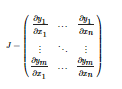

El paquete torch.autograd permite realizar ese cálculo de manera vectorizada y eficaz. 

In [10]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([403.7369, 279.8096, 945.5664], grad_fn=<MulBackward0>)


"y" no es ya un escalar, por lo que torch.autograd no puede calcular la matriz Jacobiana completa pero si podemos calcular el producto vector jacobiano. 

In [11]:
print(y.grad)

None


In [12]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])
